# Seasonal antigenic cartography
Using 2D coordinates of virus isolates provided by [racmacs](https://acorg.github.io/Racmacs/), we will perform seasonal antigenic cartography.

## Imports and configuration for plotting

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context(rc={"axes.labelsize":9,
                    "xtick.labelsize":8,
                    "ytick.labelsize":8,
                    "legend.fontsize":8,
                    "legend.title_fontsize":8})

## Variables

In [30]:
seasons = ["2019SH", "2020NH", "2020SH"]   # required seasons for cartography

## Paths and filenames

In [31]:
# paths
path_result   = "../results/Fig3a_seasonal_antigenic_cartography/"   # results will be saved in this directory

# filenames
coords_fn = path_result + "titer_matrix_racmacs_coords.csv"   # coordinates filename provided by racmacs
fig_fn    = path_result + f"Fig3a_antigenic_cartography_{seasons[0]}_{seasons[2]}.svg"

## Read data

In [32]:
ag_map = pd.read_csv(coords_fn)
ag_map.rename(columns={"name": "virus", "Unnamed: 2": "x", "Unnamed: 3": "y"}, inplace=True)

# keep only antigens
ag_map = ag_map[ag_map.type=="antigen"]
ag_map = ag_map[["virus", "x", "y"]]

## Compile metadata information

In [33]:
virus         = ag_map.virus.str.split('=', expand=True)
virus.columns = ['virusDate', 'virusName', 'virusPassage']

# indicate virus with name and passage only
ag_map["virus"] = virus.virusName + "=" + virus.virusPassage

# add date information
ag_map["virusName"] = virus.virusName
ag_map["virusDate"] = virus.virusDate

# get relevant columns
ag_map = ag_map[["virus", "virusDate", "x", "y", "virusName"]]

## Assign seasons and filter virus isolates of required seasons

In [34]:
for ind, row in ag_map.iterrows():
    if row.virusDate[5:] <= "01-31":
        ag_map.loc[ind, "season"] = row.virusDate[:4] + "NH"
    
    elif (row.virusDate[5:] >= "02-01") and (row.virusDate[5:] <= "08-31"):
        ag_map.loc[ind, "season"] = row.virusDate[:4] + "SH"
    
    elif (row.virusDate[5:] >= "09-01") and (row.virusDate[5:] <= "12-31"):
        season_year = int(row.virusDate[:4])
        ag_map.loc[ind, "season"] = str(season_year+1) +"NH"

'''
filter required seasons
'''
ag_map = ag_map[ag_map.season.isin(seasons)]

## Antigenic cartography

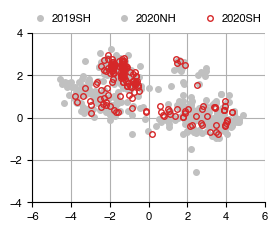

In [35]:
fig, ax = plt.subplots(figsize=(3,2.2))

ax.plot(ag_map[ag_map.season==seasons[0]].x, ag_map[ag_map.season==seasons[0]].y,
        'o', fillstyle='full', markersize=4, color='silver', label=seasons[0])

ax.plot(ag_map[ag_map.season==seasons[1]].x, ag_map[ag_map.season==seasons[1]].y,
        'o', fillstyle='full', markersize=4, color='silver', label=seasons[1])

ax.plot(ag_map[ag_map.season==seasons[2]].x, ag_map[ag_map.season==seasons[2]].y,
        'o', fillstyle='none', markersize=4, color='tab:red', label=seasons[2])


# configurations for figure
ax.legend(ncol=3, 
          loc="upper left", 
          bbox_to_anchor=(-0.06,1.17), 
          frameon=False, 
          handletextpad=0.05)

# ax.get_legend().remove()

ax.set_xticks(range(-6,7,2))
ax.set_yticks(range(-4,5,2))
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel("")
ax.set_ylabel("")

sns.despine(trim=True)

fig.savefig(fig_fn, format='svg', bbox_inches='tight')

## Repeat for different seasons (set of 3) by modifying variable "seasons"